In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
x1 = np.arange(1, 201)
x2 = np.square(x1)

y = np.log(x1)


print(x1.shape, x2.shape, y.shape)


(200,) (200,) (200,)


Text(0, 0.5, 'y')

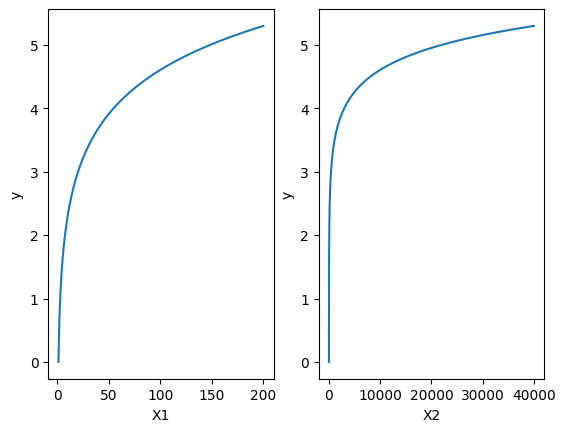

In [3]:
ax = plt.subplot(121)
ax.plot(x1, y)
ax.set_xlabel('X1')
ax.set_ylabel('y')
ax = plt.subplot(122)
ax.plot(x2, y)
ax.set_xlabel('X2')
ax.set_ylabel('y')

In [4]:
np.corrcoef(x1, y)

array([[1.        , 0.88615724],
       [0.88615724, 1.        ]])

In [5]:
np.corrcoef(x2, y)

array([[1.        , 0.76700235],
       [0.76700235, 1.        ]])

In [6]:
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression()

X = pd.DataFrame({'x1':x1, 'x2': x2})

X


,x1,x2
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
...,...,...
195,196,38416
196,197,38809
197,198,39204
198,199,39601


In [7]:
linear_reg.fit(X, y)

LinearRegression()

In [8]:
y_pred = linear_reg.predict(X)
y_pred.shape

(200,)

Text(0, 0.5, 'y_predicted')

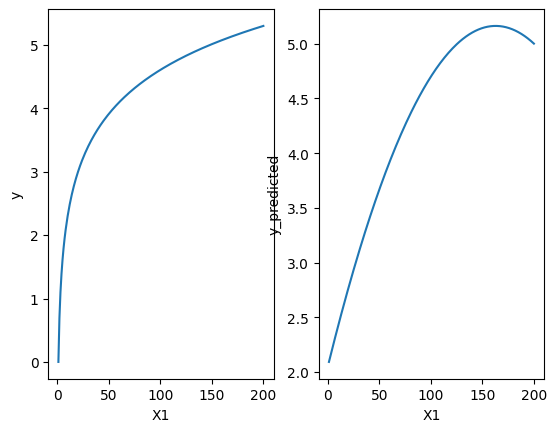

In [9]:
ax = plt.subplot(121)
ax.plot(x1, y)
ax.set_xlabel('X1')
ax.set_ylabel('y')
ax = plt.subplot(122)
ax.plot(x1, y_pred)
ax.set_xlabel('X1')
ax.set_ylabel('y_predicted')

In [10]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

error_dict = {
    'MAE':mean_absolute_error(y, y_pred), 
    'MSE': mean_squared_error(y, y_pred),
    'MAPE':mean_absolute_percentage_error(y, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y, y_pred)), 
    'R2': r2_score(y, y_pred)
}


In [11]:
error_dict

{'MAE': 0.17494392915674264,
 'MSE': 0.07263836657396912,
 'MAPE': 47123774363941.73,
 'RMSE': 0.26951505815810944,
 'R2': 0.9198664457721043}

In [38]:
x1 = np.arange(1, 500)
x2 = np.sqrt(x1)

y = np.exp(x1+x2)
data = pd.DataFrame({
    'x1':x1,
    'x2':x2,
    'y':y
})

data

,x1,x2,y
0,1,1.000000,7.000000e+00
1,2,1.414214,3.000000e+01
2,3,1.732051,1.140000e+02
3,4,2.000000,4.030000e+02
4,5,2.236068,1.389000e+03
...,...,...,...
494,495,22.248595,4.347212e+224
495,496,22.271057,1.208538e+225
496,497,22.293497,3.359697e+225
497,498,22.315914,9.339640e+225


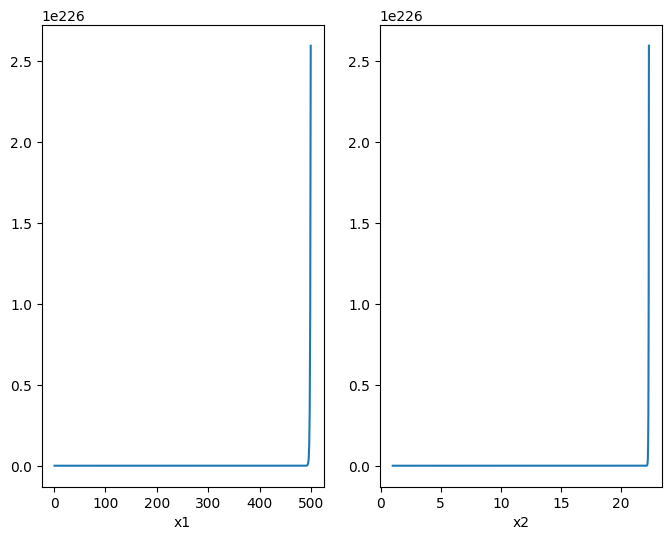

In [39]:
plt.figure(figsize=(8,6))
ax = plt.subplot(121)
ax.set_xlabel("x1")
ax.plot(data['x1'], data['y'])
ax = plt.subplot(122)
ax.set_xlabel("x2")
ax.plot(data['x2'], data['y'])

In [40]:
lin_reg = LinearRegression()

lin_reg.fit(data.drop('y', axis=1), data['y'])

c:\Users\Navazdeen S\miniconda3\envs\rit_datascience\lib\site-packages\scipy\linalg\_basic.py:1229: RuntimeWarning: overflow encountered in square
  resids = np.sum(np.abs(x[n:])**2, axis=0)


LinearRegression()

In [41]:
predict = lin_reg.predict(data.drop('y', axis=1))

Text(0, 0.5, 'y_predicted')

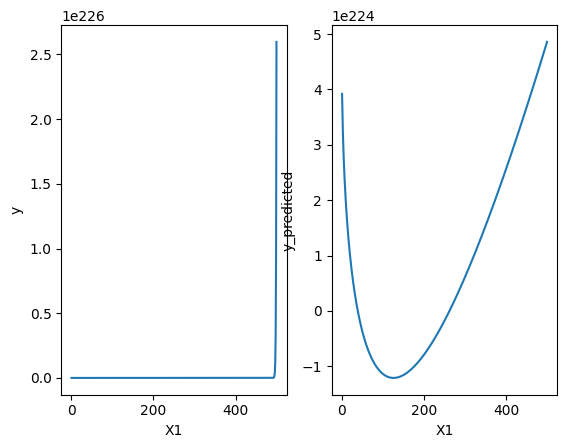

In [42]:
ax = plt.subplot(121)
ax.plot(x1, y)
ax.set_xlabel('X1')
ax.set_ylabel('y')
ax = plt.subplot(122)
ax.plot(x1, predict)
ax.set_xlabel('X1')
ax.set_ylabel('y_predicted')